In [2]:
#Assignment 4
#Determining and removing drawbacks of exponential and running mean. Task 2
#I. Comparison of the traditional 13-month running mean with the forward-backward exponential smoothing for approximation of 11-year sunspot cycle
#II. 3d surface filtration using forward-backward smoothin
#Team 12
#Yaroslav Savotin, Elizaveta Pestova, Selamawit Asfaw
#Skoltech, 2023

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#Part 1
## Comparison of the traditional 13-month running mean with the forward-backward exponential smoothing for approximation of 11-year sunspot cycle.

In [4]:
#Step 1 - Download monthly mean sunspot number dataset
df = pd.read_csv("D:\МАГИСТРАТУРА\Experimental Data Processing\Assignment 4\data_group5.csv") 

In [5]:
df

,year,month,sunspot number
0,1843,1,22.2
1,1843,2,5.9
2,1843,3,13.9
3,1843,4,15.8
4,1843,5,35.1
...,...,...,...
433,1879,2,0.9
434,1879,3,0.0
435,1879,4,10.4
436,1879,5,4.0


In [6]:
#unite year and month columns to new one named data for comforttable plotting
df['data'] = pd.to_datetime((df['year'].astype ( str ) + df['month'].astype ( str )), format="%Y%m")
df

,year,month,sunspot number,data
0,1843,1,22.2,1843-01-01
1,1843,2,5.9,1843-02-01
2,1843,3,13.9,1843-03-01
3,1843,4,15.8,1843-04-01
4,1843,5,35.1,1843-05-01
...,...,...,...,...
433,1879,2,0.9,1879-02-01
434,1879,3,0.0,1879-03-01
435,1879,4,10.4,1879-04-01
436,1879,5,4.0,1879-05-01


In [7]:
#Step 2 - make smoothing by 13-month Running mean for monthly sunspot number
R = df['sunspot number'].values[:]
numrows = len(df['sunspot number'].values[:])
R1 = [[0] for _ in range(numrows)]
for i in range(0,numrows):
    if i in range(0,6):
        R1[i] = (R[i] + R[i+5] + R[i+4] + R[i+3] + R[i+2] + R[i+1])/6        
    if i in range(numrows-6,numrows):
        R1[i] = (R[i-5] + R[i-4] + R[i-3] + R[i-2] + R[i-1] + R[i])/6
    if i in range(6,numrows-6):
        R1[i] = (R[i-6])/24 + (R[i-5] + R[i-4] + R[i-3] + R[i-2] + R[i-1] + R[i] + R[i+5] + R[i+4] + R[i+3] + R[i+2] + R[i+1])/12 + (R[i+6])/24

#np.shape(R1)
#print(R1)

In [8]:
#Step 3 - make forward-backward exponential smoothing

#we set functions for Forward exponential smoothing and Backward exponential smoothing to have acsess to them in every future step

numrows = len(R)
#forward exponential smoothing
def Exp_smoothing(Z_f,n_f, alpha):
    Xsm_f = [0 for _ in range(n_f)]
    Xsm_f[0] = R[0]
    for i in range(1,n_f):
        Xsm_f[i] = Xsm_f[i-1] + alpha*(Z_f[i] - Xsm_f[i-1])
    return Xsm_f


#backward exponential smoothing
def Exp_back_smoothing(Xsm_f,n_f, alpha):
    Xsm_back = [0 for _ in range(n_f)]
    Xsm_back[numrows-1] = Xsm_f[numrows-1]
    for i in range(n_f-2,-1,-1):
        Xsm_back[i] = Xsm_back[i+1] + alfa*(Xsm_f[i] - Xsm_back[i+1])
    return Xsm_back

In [9]:
#to make forward-backward exponential smoothing we need to set the alfa, and we can do it based on  deviation and variability indicators

#set the function for alfa
alfa_plot = [0 for _ in range(19)]
Xsm_array = [0 for _ in range(19)]
Xsm_array_f = [0 for _ in range(19)]
k = 0
Xsm_array = [0 for _ in range(19)]
for i in range(5,100,5):
    alfa = i/100
    Xsm_array_f[k] = Exp_smoothing(R,numrows,alfa)
    Xsm_array[k] = Exp_smoothing(Xsm_array_f[k],numrows,alfa)
    alfa_plot[k] = i/100
    k +=1

In [12]:
# set the functions for deviation and variability indicators for exponential mean

#deviation indicator for Exponential mean
Id_em = [0 for _ in range(19)]
for i in range(19):
    for j in range(numrows):
        Id_em[i] += np.square(R[j] - Xsm_array[i][j])
        
#variability indicator for Exponential mean
Iv_em = [0 for _ in range(19)]
for i in range(19):
    for j in range(numrows-2):
        Iv_em[i] += (Xsm_array[i][j+2] - 2*Xsm_array[i][j+1] + Xsm_array[i][j])**2

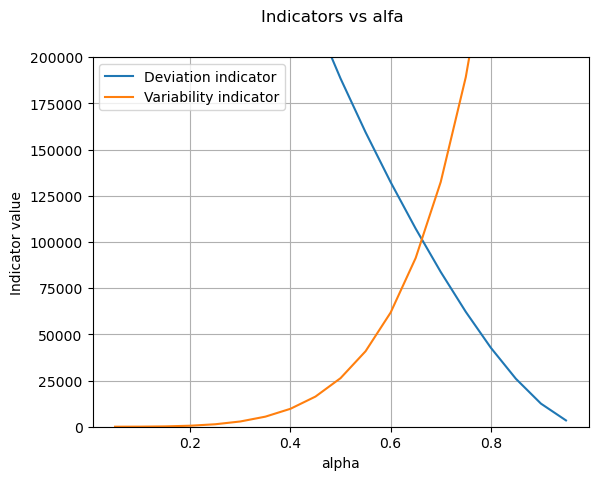

In [13]:
#plot the functions for to make conclusion abour choise of alfa
y1 = Id_em
y2 = Iv_em
x = alfa_plot
plt.plot(x,y1,label = 'Deviation indicator')
plt.plot(x,y2,label = 'Variability indicator')
plt.ylim(0, 200000)
plt.xlabel('alpha')
plt.ylabel('Indicator value')
plt.suptitle('Indicators vs alfa')
plt.legend()
plt.grid(True)

In [11]:
#Conclusion: we know that Deviation indicator represents the difference between our measurements and estimation values
#should be big - it represents good smoothing of noisy peaks, at the same time our Variability Indicator 
#which represenrs the difference betweem close values of dataset should be small, to indicate a good quality of smoothing.
#But in conditions of uncertanty (we dont know how noisy our results actually are), we can not make strong conclusion about value of alfa.
#So we need to try  very small alpha1 = 0.1, small alpha2 = 0.2 and big alpha2 = 0.6 values to compare it visually with actual measurements and running mean smoothing

In [14]:
#forward exponential smoothing with alpha1 = 0.1

alpha1 = 0.1

Xsm1 = Exp_smoothing(R,numrows,alpha1)

#backward exponential smoothing with alpha1 = 0.1 

Xsm1_back = Exp_back_smoothing(Xsm1,numrows,alpha1)


#forward exponential smoothing with alfa2 = 0.2

alpha2 = 0.2

Xsm2 = Exp_smoothing(R,numrows,alpha2)

#backward exponential smoothing with alpha1 = 0.2

Xsm2_back = Exp_back_smoothing(Xsm2,numrows,alpha2)


#forward exponential smoothing with alfa2 = 0.6
alpha3 = 0.6

Xsm3 = Exp_smoothing(R,numrows,alpha3)

#backward exponential smoothing with alpha1 = 0.6 

Xsm3_back = Exp_back_smoothing(Xsm3,numrows,alpha3)

In [21]:
Xsm3

[22.2,
 12.420000000000002,
 13.308000000000002,
 14.8032,
 26.981279999999998,
 21.352512,
 18.081004800000002,
 18.992401920000002,
 11.736960768000001,
 10.0347843072,
 23.033913722879998,
 21.933565489152,
 18.1934261956608,
 21.97737047826432,
 22.290948191305727,
 29.67637927652229,
 23.390551710608918,
 13.076220684243568,
 26.35048827369743,
 34.360195309478975,
 20.70407812379159,
 29.821631249516635,
 22.668652499806655,
 30.66746099992266,
 37.94698439996906,
 58.85879375998762,
 66.80351750399504,
 83.72140700159801,
 81.30856280063921,
 63.60342512025568,
 56.04137004810227,
 54.75654801924091,
 51.48261920769636,
 61.273047683078545,
 63.92921907323142,
 85.27168762929257,
 72.86867505171702,
 80.08747002068681,
 95.93498800827473,
 107.67399520330989,
 103.00959808132396,
 106.24383923252958,
 88.99753569301183,
 90.37901427720473,
 143.31160571088188,
 113.36464228435275,
 105.7058569137411,
 107.74234276549643,
 105.73693710619858,
 87.23477484247944,
 120.693909936991

In [22]:
Xsm3_back

[21.71348120331925,
 12.469624066385041,
 13.41248132770079,
 15.397626554015789,
 26.691731080315762,
 21.19030160631525,
 18.10830412630497,
 18.62699132609936,
 11.684190041987156,
 10.681546247743094,
 22.970023118061867,
 21.75610162651741,
 18.384288236460222,
 22.010667011649236,
 22.643301145962642,
 29.338007284444004,
 22.90893943495653,
 13.758306197561211,
 26.71793095059644,
 33.699341811677606,
 21.143125353451588,
 29.485022716991573,
 23.08946059901544,
 31.084814483982335,
 39.01453068111614,
 59.29791002291071,
 67.64111901844956,
 83.55554779308548,
 80.40422283134755,
 63.22176341480622,
 55.970191011266515,
 54.61778931138717,
 51.981373862166194,
 61.45771229709304,
 64.96633996336841,
 84.67163687597126,
 73.27067256286645,
 80.9086252747055,
 96.51057510106057,
 107.4467298639914,
 103.12868841694001,
 105.39140479364491,
 89.19515045483631,
 92.94983092950149,
 141.79534732313977,
 112.98643795603992,
 105.800555718096,
 107.59983300083918,
 104.8921474723515,


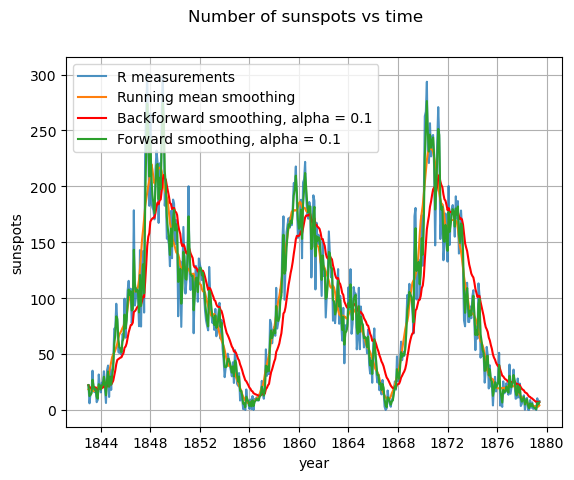

In [18]:
#plot
y0 = R
y1 = R1
y2 = Xsm1_back
y3 = Xsm3
#y3 = Xsm1
x = df['data'].values[:]
plt.plot(x,y0,label = 'R measurements', alpha=0.8)
plt.plot(x,y1,label = 'Running mean smoothing')
plt.plot(x,y2,label = 'Backforward smoothing, alpha = 0.1', color='r')
plt.plot(x,y3,label = 'Forward smoothing, alpha = 0.1')
#plt.plot(x,y3,label = 'Forward Exponential smoothing, alpha = 0.1', color='b')
plt.xlabel('year')
plt.ylabel('sunspots')
plt.suptitle('Number of sunspots vs time')
plt.legend()
plt.grid(True)

In [161]:
#Conclusion: very small alpha provides high level of smoothing but causes the shift in our

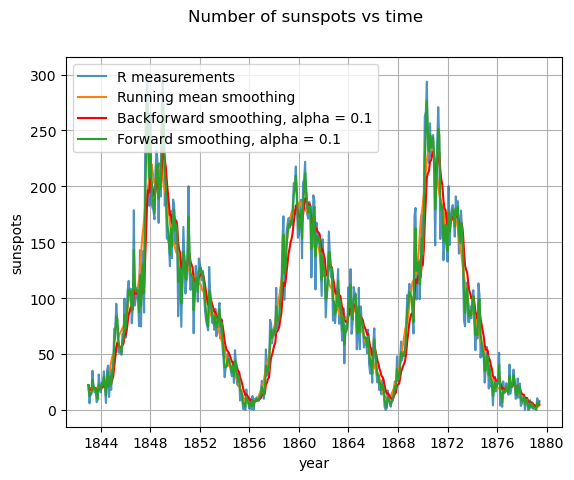

In [20]:
#plot
y0 = R
y1 = R1
y2 = Xsm2_back
y3 = Xsm3
x = df['data'].values[:]
plt.plot(x,y0,label = 'R measurements', alpha = 0.8)
plt.plot(x,y1,label = 'Running mean smoothing')
plt.plot(x,y2,label = 'Backforward smoothing, alpha = 0.1', color='r')
plt.plot(x,y3,label = 'Forward smoothing, alpha = 0.1')
plt.xlabel('year')
plt.ylabel('sunspots')
plt.suptitle('Number of sunspots vs time')
plt.legend()
plt.grid(True)

In [110]:
#Conclusion: small alpha is optimal choice for smoothing

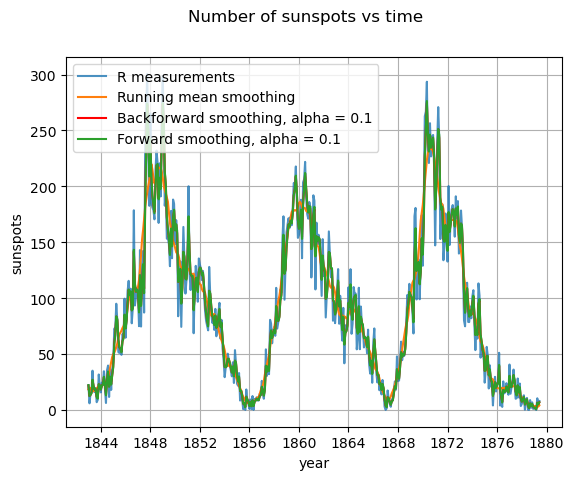

In [19]:
#plot
y0 = R
y1 = R1
y2 = Xsm3_back
y3 = Xsm3
x = df['data'].values[:]
plt.plot(x,y0,label = 'R measurements', alpha = 0.8)
plt.plot(x,y1,label = 'Running mean smoothing')
plt.plot(x,y2,label = 'Backforward smoothing, alpha = 0.1', color='r')
plt.plot(x,y3,label = 'Forward smoothing, alpha = 0.1')
plt.xlabel('year')
plt.ylabel('sunspots')
plt.suptitle('Number of sunspots vs time')
plt.legend()
plt.grid(True)

In [112]:
#Conclusion: big alpha does not provide enough filtration

In [ ]:
#Part 1 Conclusion: after analizing and plotting the data, we can consider that even good smoothing with alpha=0.2, does not provide as good result as 13-mounth running mean provides

In [164]:
#Part 2

#1. noisy_surface.txt(available mesurements to work with)
#true_surface.txt(true surface to compare the estimation results)

#2. Plot noisy and true surface for visualization purposes.To plot 3d surfaces in matlab, there is a command “mesh”.
#You can assign a colormap for the plot, i.e., “colormap jet”, “set(gca,'colormap','jet')”
#The plot should be accompanied with the “colorbar".

In [165]:
#Step 1 - download surface data

noisy = np.loadtxt("noisy_surface.txt")
n = len(noisy)

true = np.loadtxt("true_surface.txt")
x = np.loadtxt("true_surface.txt")
y = np.loadtxt("true_surface.txt")

noisy

array([[61.26  , 33.4491, 60.0272, ..., 54.7422, 55.5336, 64.1533],
       [38.4392, 56.0842, 24.2585, ..., 28.1391, 50.7476, 45.8256],
       [59.4336, 55.5091, 52.3045, ..., 66.1099, 47.8726, 43.1854],
       ...,
       [60.9133, 67.1038, 49.7542, ..., 54.8217, 46.8984, 47.3424],
       [57.8051, 44.5932, 66.0002, ..., 34.3572, 39.3617, 44.418 ],
       [56.4043, 54.3355, 58.5813, ..., 49.8374, 55.3364, 65.9077]])

In [166]:
#Step 2 - Plot noisy and true surface for visualization purposes
for i in range(n):
    for j in range(n):
        x[i][j] = j
        y[i][j] = j
x = x.T

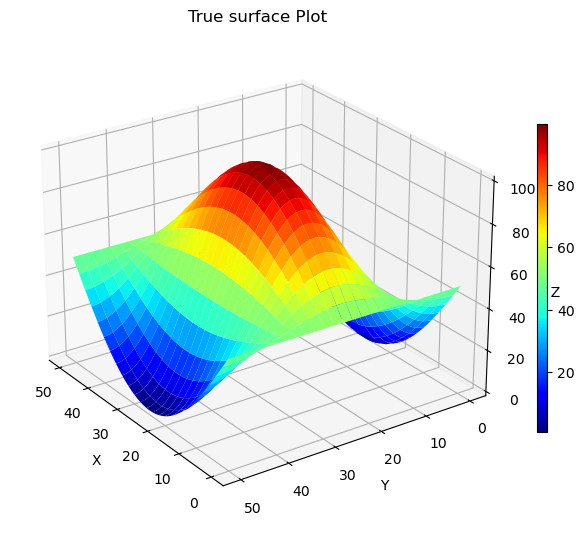

In [167]:
#plot true surface
fig = plt.figure(figsize=(8,8))
ax3d = fig.add_subplot(111, projection='3d')

#plot = ax3d.plot_wireframe(x,y,true, cmap = 'jet')
plot = ax3d.plot_surface(x,y,true, cmap = 'jet')
ax3d.set_title('True surface Plot')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('  Z')
fig.colorbar(plot, ax = ax3d, shrink = 0.5, aspect = 30) # создание шкалы градиента
ax3d.view_init(25, 145)

plt.show()

In [168]:
#Conclusion: nicely looking surface of true values

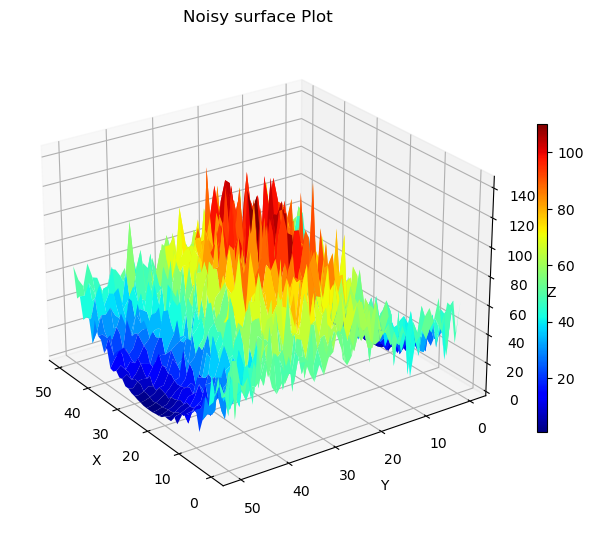

In [169]:
#plot noisy surface
fig = plt.figure(figsize=(8,8))
ax3d = plt.axes(projection="3d")

my_cmap = plt.get_cmap('jet')

#plot = ax3d.plot_wireframe(x,y,noisy, cmap = my_cmap)
plot = ax3d.plot_surface(x,y,noisy, cmap = 'jet')
ax3d.set_title('Noisy surface Plot')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
fig.colorbar(plot, ax = ax3d, shrink = 0.5, aspect = 30) # создание шкалы градиента
ax3d.view_init(25, 145)
plt.show()

In [170]:
#Conclusion: high level of noise destroys understanding of data nature

In [171]:
#Step 3 - Determine the variance of deviation of noisy surface from the true one.

var_noisy = np.reshape(noisy, (1,np.product(noisy.shape)))
var_true = np.reshape(true, (1,np.product(true.shape)))
s1 = 0
for i in range(n**2):
    s1 += (var_noisy[0][i] - var_true[0][i] )**2
s1 = s1/n**2
print('Variance of deviation of noisy surface from the true one =',s1)

Variance of deviation of noisy surface from the true one = 122.82584136052297


In [172]:
# By following the procedure we have determined the variation of deviation of noisy surface from the true one which is 122.82584136052297

In [173]:
#Step 4 - Apply forward-backward exponential smoothings
#The smoothing constant can be 𝐀 = 0.335
#There should be 4 steps in forward-backward smoothing of a surface.

#Step 1
# Forward exponential smoothing of rows
alfa = 0.335
def F_smoothing(a,n):
    Xsm = [[0]*n for _ in range(n)]
    for i in range(n):
        Xsm[i][0] = a[i][0]
    for i in range(n):
        for j in range(1,n):
            Xsm[i][j] = Xsm[i][j-1] + alfa*(a[i][j] - Xsm[i][j-1])
    return Xsm

In [174]:
#Step 2
#backward exponential smoothing
def B_smoothing(a,n):
    Xsm_back = [[0]*n for _ in range(n)]
    for i in range(n):
        Xsm_back[i][n-1] = a[i][n-1]
    for i in range(n): # 50 -> 0 
        for j in range(n-2,-1,-1):  #49 -> 0      
            Xsm_back[i][j] = Xsm_back[i][j+1] + alfa*(a[i][j] - Xsm_back[i][j+1])
    return Xsm_back

In [175]:
Xsm_F_row = F_smoothing(noisy, n)
Xsm_B_row = B_smoothing(Xsm_F_row, n)

In [176]:
#fig = plt.figure(figsize=(8,8))
#ax3d = plt.axes(projection="3d")

#my_cmap = plt.get_cmap('jet')

#plot = ax3d.plot_surface(x,y,np.array(Xsm_B_row), cmap = 'jet')
#ax3d.set_title(' surface Plot')
#ax3d.set_xlabel('X')
#ax3d.set_ylabel('Y')
#ax3d.set_zlabel('Z')
#fig.colorbar(plot, ax = ax3d, shrink = 0.5, aspect = 30) # создание шкалы градиента
#ax3d.view_init(30, 145)
#plt.show()

In [177]:
#Step 3
# Forward exponential smoothing of columns
def F_column_smoothing(a,n):
    Xsm_c = [[0]*n for _ in range(n)]
    for i in range(n):
        Xsm_c[n-1][i] = a[n-1][i]
    for j in range(n):
        for i in range(n-2,-1,-1):        
            Xsm_c[i][j] = Xsm_c[i+1][j] + alfa*(a[i][j] - Xsm_c[i+1][j])
    return Xsm_c

In [178]:
#Step 4
#backward exponential smoothing of columns
def B_column_smoothing(Xsm,n):
    Xsm_back_c = [[0]*n for _ in range(n)]
    for i in range(n):
        Xsm_back_c[0][i] = Xsm[0][i]
    for j in range(n):
        for i in range(1,n):
            Xsm_back_c[i][j] = Xsm_back_c[i-1][j] + alfa*(Xsm[i][j] - Xsm_back_c[i-1][j])
    return Xsm_back_c

In [179]:
Xsm_F_column = F_column_smoothing(Xsm_B_row, n)
Xsm_B_column = B_column_smoothing(Xsm_F_column, n)

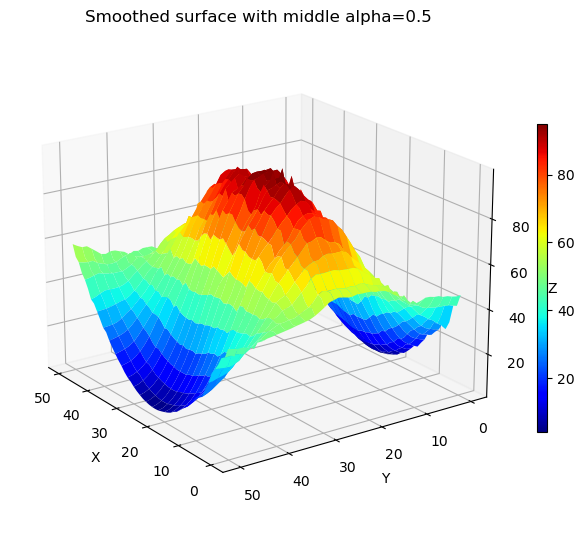

In [180]:
fig = plt.figure(figsize=(8,8))
ax3d = plt.axes(projection="3d")

my_cmap = plt.get_cmap('jet')

#plot = ax3d.plot_wireframe(x,y,np.array(Xsm_F_column), cmap = 'jet')
plot = ax3d.plot_surface(x,y,np.array(Xsm_F_column), cmap = 'jet')
ax3d.set_title('Smoothed surface with middle alpha=0.5')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
fig.colorbar(plot, ax = ax3d, shrink = 0.5, aspect = 30) # создание шкалы градиента
ax3d.view_init(20, 145)
plt.show()

In [181]:
#Conclusion: very nice transformation of row and noisy surface
#to a pleasant looking one, but now we need to prove effectivness of transformation numericaly by calculating variance

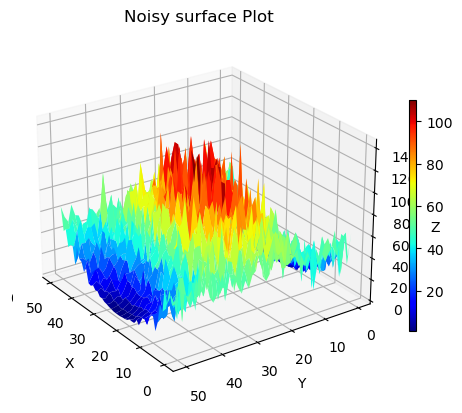

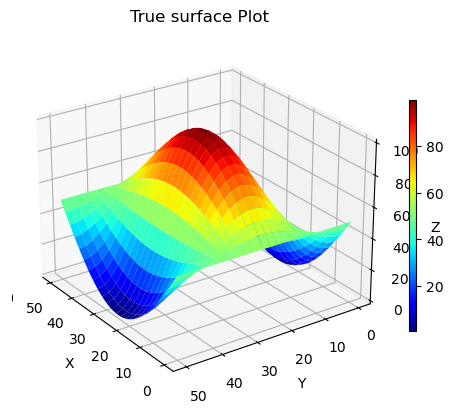

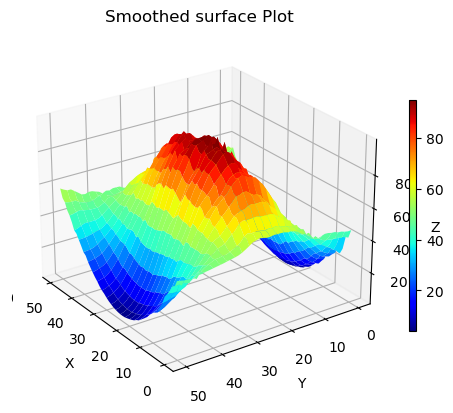

In [182]:
fig = plt.figure(figsize=(6,6))
fig.add_subplot(1, 2, 1, projection='3d')
ax3d = plt.axes(projection="3d")

my_cmap = plt.get_cmap('jet')


plot = ax3d.plot_surface(x,y,noisy, cmap = 'jet')
ax3d.set_title('Noisy surface Plot')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
fig.colorbar(plot, ax = ax3d, shrink = 0.5, aspect = 30) # создание шкалы градиента
ax3d.view_init(25, 145)



#-----------------------------------------------------
fig = plt.figure(figsize=(6,6))
fig.add_subplot(1, 2, 1, projection='3d')
ax3d = plt.axes(projection="3d")

#plot = ax3d.plot_wireframe(x,y,true, cmap = 'jet')
plot = ax3d.plot_surface(x,y,true, cmap = 'jet')
ax3d.set_title('True surface Plot')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
fig.colorbar(plot, ax = ax3d, shrink = 0.5, aspect = 30) # создание шкалы градиента
ax3d.view_init(25, 145)



#-----------------------------------------------------



fig = plt.figure(figsize=(6,6))
fig.add_subplot(1, 2, 1, projection='3d')
ax3d = plt.axes(projection="3d")

my_cmap = plt.get_cmap('jet')

#plot = ax3d.plot_wireframe(x,y,np.array(Xsm_F_column), cmap = 'jet')
plot = ax3d.plot_surface(x,y,np.array(Xsm_F_column), cmap = 'jet')
ax3d.set_title('Smoothed surface Plot')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
fig.colorbar(plot, ax = ax3d, shrink = 0.5, aspect = 30)
ax3d.view_init(25, 145)
plt.show()

plt.show()

In [183]:
#Conclusion: this series of plots nicely depicts how noisy surface differs from true one, and how we change it and make it close to true with smoothing

In [184]:
#Step 6 - determine the variance of deviation of smoothed surface from the true one.
# Compare the variance with that from item 3.

#calculate new variance of deviation of smoothed surface from the true one
index = 0
var_smoothed = [0 for _ in range(n**2)]
for i in range(n):
    for j in range(n):
        var_smoothed[index] = Xsm_B_column[i][j]
        index += 1
var_true = np.reshape(true, (1,np.product(true.shape)))
s2 = 0
for i in range(n**2):
    s2 += (var_smoothed[i] - var_true[0][i] )**2
s2 = s2/n**2
print('Variance of deviation of smooth surface from the true one =',s2)

Variance of deviation of smooth surface from the true one = 7.920949927804128


In [185]:
#after our manipulations the variance value decreased significally
#compare variance of noisy and smooth surface
dif = s1/s2
print('Comparison of variance:\n',dif)

Comparison of variance:
 15.50645345318742


In [186]:
#Conclusion: after our manipulations the variance value decreased significally - in 15.5 times in compaeison with noisy/true variance.
#It deffinately means that the method we applyied was powerful and could recover the noisy dataset very close to the true one

In [187]:
#Step 7 - trying different values of alpha and explore how it affects on estimation results

#Observation results are following:

#small values of alfa (alpha=0.05) give us high level of smoothing, however it causes distortion of surface
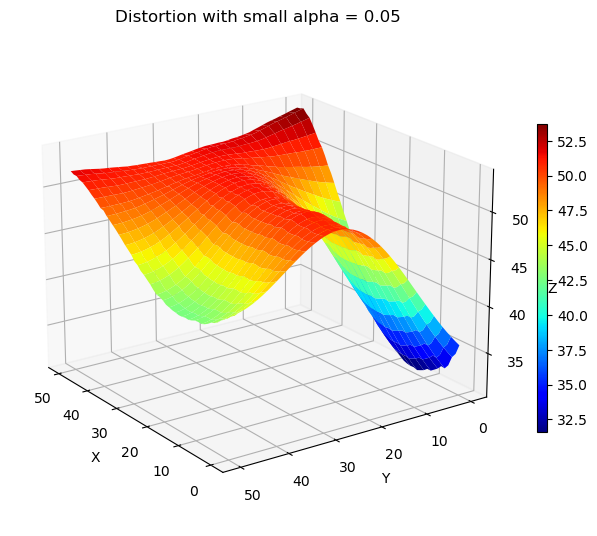

#middle values of alfa (alpha=0.5) give some level of smoothing, but in this case its not enough to read surface clearly
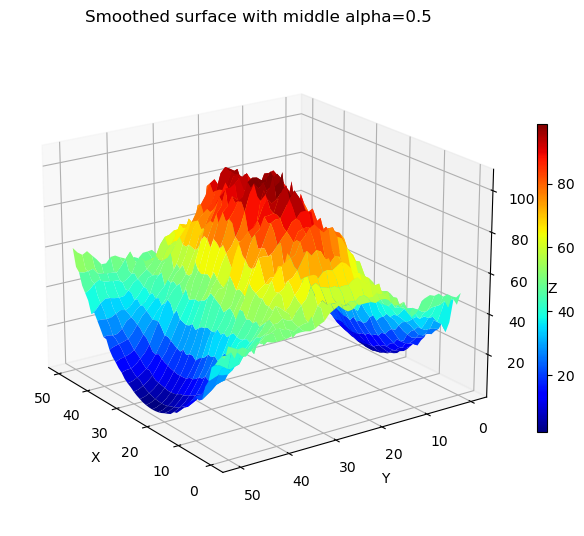

#big values of alfa (alpha=0.8) provede almost zero filtration
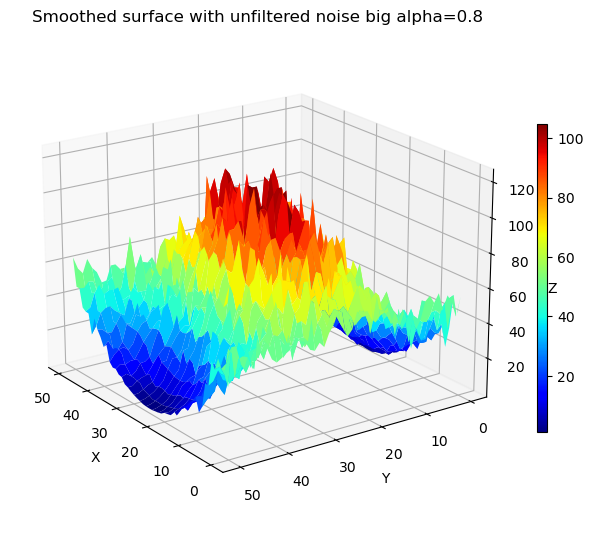

In [150]:
#Step 8 - Personal Learning log 

#Yaroslav: from this assignment I lerned the true magic of recovering data almost from scratch.
#I was really amazed how such simple method as exponential smoothing could rebuild so noisy data set in almost identical to the true one.

#Lisa: I learned how to create 3d plots and work with 2d arrays processing them with familiar method of forward-backward exponential smoothing.
#First part of assignment was useful to train exponential smoothing on 1d arrays again.
    
#Selamawit Asfaw: Such a way of recovering data coluld be useful in my future learning activities, so I made a note about it.
#It was pleasant to see how methods we learned for one dimension datasets can be applyied on more complicated sources and deepicted so nicely on plots, made by Lisa.